#### Стоимость жилья требует значительных инвестиций как со стороны потребителей, так и со стороны застройщиков. И когда дело доходит до планирования бюджета — будь то личного или корпоративного, — последнее, что кому-либо нужно, - это неопределенность в отношении одного из своих самых крупных расходов. Сбербанк, старейший и крупнейший банк России, помогает своим клиентам прогнозировать цены на недвижимость, чтобы арендаторы, застройщики и кредиторы были более уверены при заключении договора аренды или покупке здания.
#### В этом ноутбуке проводится аналитическое исследование большого количества факторов на стоимость жилья. Набор данных включает информацию об общих условиях в экономике и финансовом секторе России. Данные собраны с августа 2011 по июнь 2015 года. 

# Описание данных:
* price_doc: цена продажи
* id: id транзакции
* timestamp: дата транзакции
* full_sq: общая площадь в квадратных метрах, включая лоджии, балконы и другие нежилые помещения
* life_sq: жилая площадь в квадратных метрах, исключая лоджии, балконы и другие нежилые помещения
* floor: для квартир этаж здания
* max_floor: количество этажей в здании
* material: материал
* build_year: год постройки
* num_room: количество жилых комнат
* kitch_sq: площадь кухни
* state: состояние квартиры
* product_type: покупка или инвестиция, осуществляемая владельцем
* sub_area: название района

Набор данных также включает в себя набор характеристик, относящихся к окрестностям каждого объекта недвижимости, и некоторые характеристики, которые являются постоянными в каждой подобласти (известной как район). Большинство названий говорят сами за себя, со следующими примечаниями. Полный список приведен ниже.

* full_all: население района
* male_f, female_f: население района в разбивке по полу
* young_*: население моложе трудоспособного возраста
* work_*: население трудоспособного возраста
* ekder_*: население пенсионного возраста
* n_m_{all|male|female}: население в возрасте от n до m лет
* build_count_*: здания в районе по типу постройки или году
* x_count_500: количество x в радиусе 500 метров от объекта
* x_part_500: доля x в пределах 500 м от объекта недвижимости
* _sqm_: квадратных метров
* cafe_count_d_price_p: количество кафе в радиусе d метров от отеля, в которых проверяется средний счет
* trc_: торговые центры
* prom_: промышленные зоны
* green_: зеленые зоны
* metro_: метро
* _avto_: расстояние до машин
* mkad_: московская кольцевая автомобильная дорога
* ttk_: третье транспортное кольцо
* sadovoe_: садовое кольцо
* bulvar_ring_: бульварное кольцо
* kremlin_: центр города
* zd_vokzaly_: железнодорожный вокзал
* oil_chemistry_: грязная промышленность
* ts_: электростанция

# Этапы выполенения проекта
* Отсутствующие данные
* Проблемы с качеством данных
* Признаки исобенность дома
* Демографические признаки
* Образовательные признаки
* Культурные/рекреационные признаки
* Инфраструктурные признаки
* Исследование важности признаков

# Загрузка библиотек и данных

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

%matplotlib inline

pd.set_option("display.max_columns", 500)
color = sns.color_palette()
pd.options.mode.chained_assignment = None

In [71]:
z = zipfile.ZipFile('/kaggle/input/sberbank-russian-housing-market/train.csv.zip')
z.extractall()

In [72]:
train_df = pd.read_csv('/kaggle/working/train.csv', parse_dates=['timestamp'])
train_df['price_doc_log'] = np.log1p(train_df['price_doc'])

In [73]:
train_df.shape

(30471, 293)

Посмотрим на случайные 10 строк таблицы

In [74]:
train_df.sample(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

Получим общее представление о данных

In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 293 entries, id to price_doc_log
dtypes: datetime64[ns](1), float64(120), int64(157), object(15)
memory usage: 68.1+ MB


# Пропущенные значения

В данных имеются пропущенные значения
Рассмотрим сколько имеются пропущенных значений и распределение пропущенных значений по каждому из признаков

In [76]:
train_na = (train_df.isnull().sum()/train_df.shape[0]) * 100
train_na
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)

In [77]:
print(f"Максимальный процент пропусков в признаке {train_na.idxmax()}: {train_na.max().round(2)}%")
print(f"Минимальный процент пропусков в признаке {train_na.idxmin()}: {train_na.min().round(2)}%")

Максимальный процент пропусков в признаке hospital_beds_raion: 47.39%
Минимальный процент пропусков в признаке ID_railroad_station_walk: 0.08%


[Text(0.5, 1.0, 'Процент пропусков данных в признаке'),
 Text(0, 0.5, '% пропусков')]

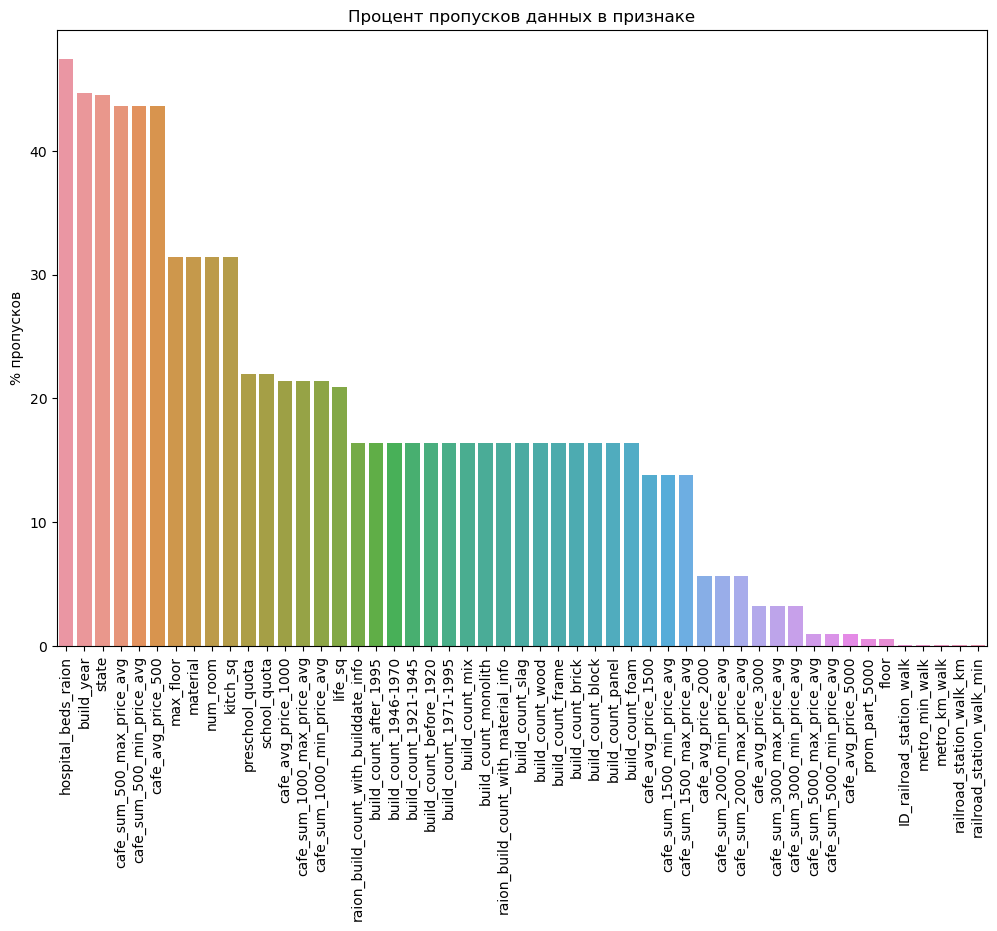

In [78]:
f, ax = plt.subplots(figsize= (12,8))
plt.xticks(rotation="vertical")
sns.barplot(x=train_na.index, y=train_na)
ax.set(title="Процент пропусков данных в признаке", ylabel="% пропусков")

Как можно заметить из данных в 51 из 292 столбцов имеются пропущенные значения. Процент пропущенных значений колеблется от 0,08% в ID_railroad_station_walk до 47,39% в hospital_beds_raion.

# Предобработка данных

Рассмотрим данные на наличие ошибок

Для начала рассмотрим все не категориальные признаки и дату переведем в числовой вид

In [79]:
train_df_non_cat = train_df.select_dtypes(exclude=['object'])
for col in train_df_non_cat.columns:
    if train_df_non_cat[col].dtype == 'datetime64[ns]':
        train_df_non_cat[col] = train_df_non_cat[col].apply(lambda x: x.timestamp())

Построим boxplot для каждого из признаков

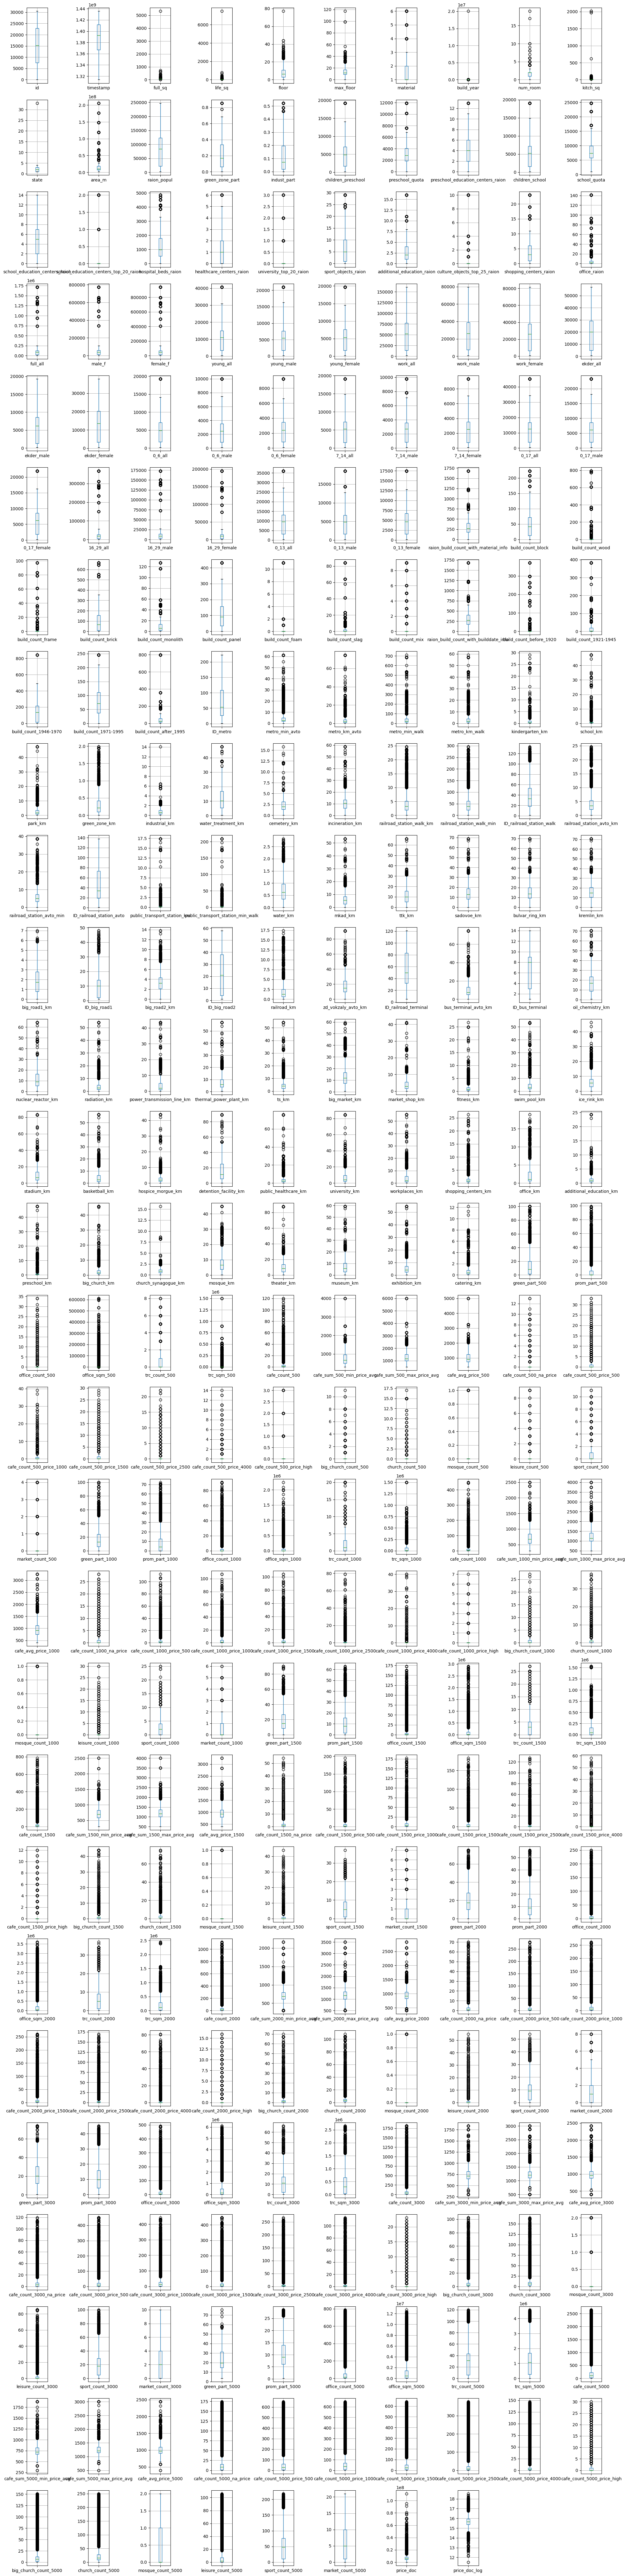

In [80]:
columns = train_df_non_cat.columns

num_rows = (len(columns) + 9) // 10
num_cols = min(len(columns), 10)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 3*num_rows))

for i, col in enumerate(columns):
    ax = axes[i // 10, i % 10] if num_rows > 1 else axes[i % 10]
    train_df_non_cat.boxplot(column=col, ax=ax)

if len(columns) % 10 != 0:
    for i in range(len(columns), num_rows * num_cols):
        ax = axes[i // 10, i % 10] if num_rows > 1 else axes[i % 10]
        ax.remove()
plt.tight_layout()
plt.show()

Данный подход не лучшим образом позволяет оценить количество выбросов и неверных данных. Но при этом даже при данном способе видно, что в данных, где state=33 и build_year порядка 20млн неверные и стоит их подкорректировать.

Заменим значение state с 33 на 3. Также год постройки свыше 20млн заменим на подходящее значение.

In [81]:
train_df.loc[train_df['state'] == 33, 'state'] = train_df['state'].mode().iloc[0]

In [82]:
train_df["build_year"].max()

20052009.0

Скорее всего значение года постройки должно находится в промежутке с 2005 по 2009. Возьмем среднее 2007.

In [83]:
train_df.loc[train_df['build_year'] == 20052009, 'build_year'] = 2007

Также заметно, что имеется серьезный выброс в общей площади и жилой площади. В дальнейшем опустим данные значения. 

In [84]:
train_df.size

8928003

In [85]:
train_df = train_df.drop(train_df[train_df['full_sq'] > 2000].index)
train_df.size


8927710

In [86]:
train_df = train_df.drop(train_df[train_df['life_sq'] > 2000].index)
train_df.size

8927417

Параметр full_sq означает "общая площадь в квадратных метрах, включая лоджии, балконы и другие нежилые помещения", а параметр life_sq означает "жилая площадь в квадратных метрах, исключая лоджии, балконы и другие нежилые помещения". Таким образом, должно быть так, что life_sq всегда меньше, чем full_sq. Если данные условия не соблюдается, то также исключим данные.

In [94]:
(train_df['life_sq'] > train_df['full_sq']).sum()

0

In [93]:
train_df = train_df.drop(train_df[train_df["life_sq"] > train_df["full_sq"]].index)

# Анализ данных
## Внутренние характеристики дома
Рассмотрим корелляцию между внутренними характеристиками дома и ценой

In [87]:
internal_features = ["full_sq", "life_sq", "floor", "max_floor", "build_year", "num_room", "kitch_sq", "state", "price_doc"]
corr_matrix = train_df[internal_features].corr()

<Axes: >

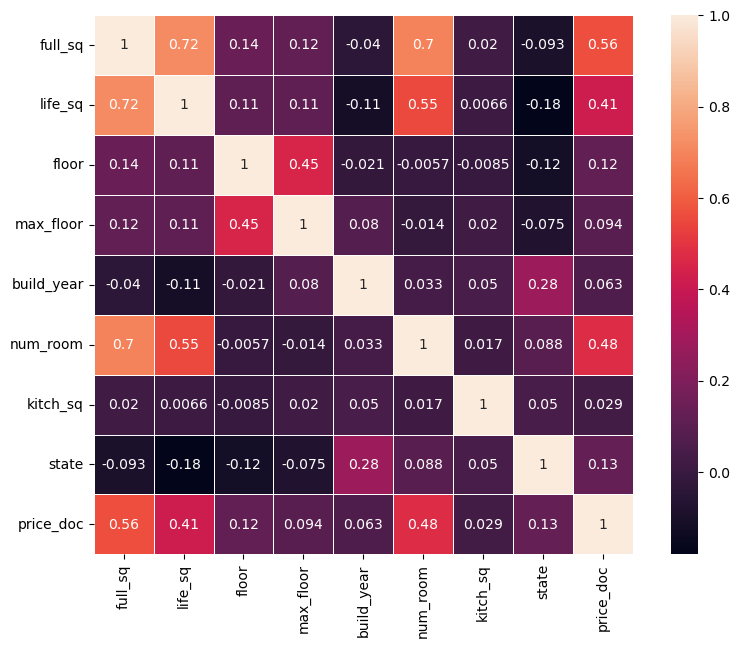

In [88]:
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation="vertical")
sns.heatmap(corr_matrix, square=True, linewidths=0.5, annot=True)

Как видно из корреляционной матрицы, то количество комнат num_room и общая площадь full_sq наилучшим образом коррелируют с ценой price_doc. Рассмотрим их.

### Общая площадь и количество комнат
Построим диаграмму рассеяния (scatter plot) для данных параметров

[Text(0.5, 1.0, 'Цена за квадратный метр'),
 Text(0.5, 0, 'Площадь'),
 Text(0, 0.5, 'Цена')]

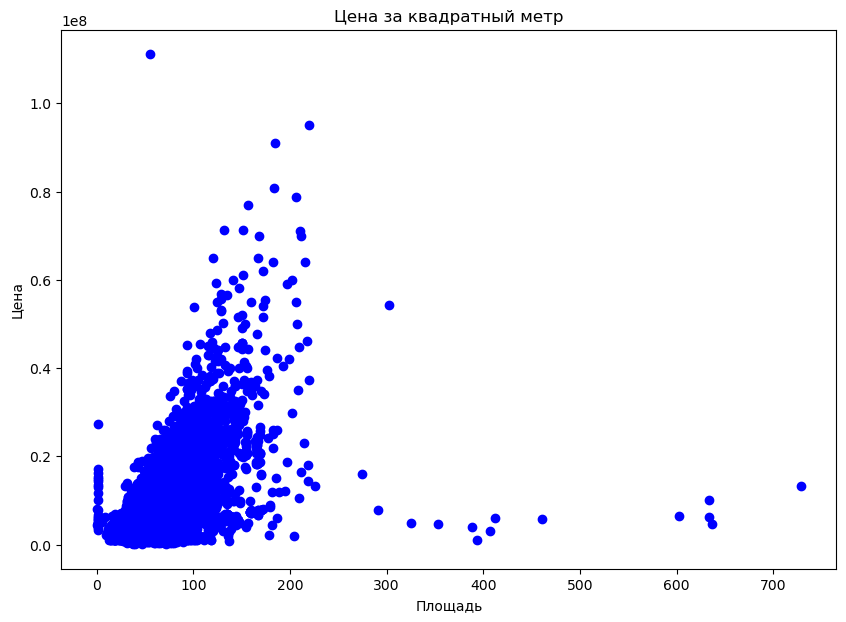

In [91]:
f, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x=train_df["full_sq"], y=train_df["price_doc"], c="b")
ax.set(title="Цена за квадратный метр", xlabel="Площадь", ylabel="Цена")